In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
path = "D:/HAR\Human Action Recognition"
y_temp = pd.read_csv(path+"/Training_set.csv")
y=[]
for i in os.listdir(path+"/train"):
    index = i.split("_")[1]
    index = int(index.split(".")[0])
    y.append(y_temp.label[index-1])
y = np.array(y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [3]:
def make_image(size=32):
    path = "D:/HAR\Human Action Recognition"
    X = []
    for i in os.listdir(path+"/train"):
        temp = cv2.imread(path+"/train/"+i)
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        temp = cv2.resize(temp, (size, size))
        X.append(temp)
    X = np.array(X)
    X = X/255.0
    return X

In [4]:
X = make_image(128)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
predictions = keras.layers.Dense(15, activation="softmax", kernel_initializer="he_normal")(x)
model = keras.models.Model(inputs = base_model.input, outputs = predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
top_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
296/296 [==============================] - 34s 82ms/step - loss: 2.7075 - accuracy: 0.0854 - val_loss: 2.6675 - val_accuracy: 0.0914
Epoch 2/10
296/296 [==============================] - 22s 74ms/step - loss: 2.6434 - accuracy: 0.1290 - val_loss: 2.6392 - val_accuracy: 0.1244
Epoch 3/10
296/296 [==============================] - 22s 73ms/step - loss: 2.6042 - accuracy: 0.1502 - val_loss: 2.5885 - val_accuracy: 0.1594
Epoch 4/10
296/296 [==============================] - 22s 73ms/step - loss: 2.5708 - accuracy: 0.1717 - val_loss: 2.5564 - val_accuracy: 0.2010
Epoch 5/10
296/296 [==============================] - 22s 75ms/step - loss: 2.5420 - accuracy: 0.1884 - val_loss: 2.5366 - val_accuracy: 0.1892
Epoch 6/10
296/296 [==============================] - 22s 75ms/step - loss: 2.5183 - accuracy: 0.1937 - val_loss: 2.5190 - val_accuracy: 0.2013
Epoch 7/10
296/296 [==============================] - 22s 74ms/step - loss: 2.4992 - accuracy: 0.2011 - val_loss: 2.4966 - val_accuracy:

In [7]:
for layer in model.layers:
    layer.trainable=True

In [8]:
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
296/296 [==============================] - 68s 205ms/step - loss: 2.8963 - accuracy: 0.3038 - val_loss: 4.0845 - val_accuracy: 0.06730s - loss: 4. - ETA:
Epoch 2/30
296/296 [==============================] - 59s 200ms/step - loss: 1.5857 - accuracy: 0.4970 - val_loss: 3.1305 - val_accuracy: 0.0702
Epoch 3/30
296/296 [==============================] - 60s 202ms/step - loss: 1.1500 - accuracy: 0.6289 - val_loss: 2.4224 - val_accuracy: 0.3279 - loss: 1.0037 - accuracy - E - ETA: 37s - loss: 1.0460 - accuracy: 0.6 - ETA: 36s - loss: 1.0496  - ETA: 17s - ETA: 2s - loss: 1.142 - ETA: 0s - loss: 1.1492 - accuracy: 
Epoch 4/30
296/296 [==============================] - 60s 203ms/step - loss: 0.8539 - accuracy: 0.7217 - val_loss: 2.1823 - val_accuracy: 0.434952 - accurac - ETA: 36s - loss: 0.7327 - accu - ETA: 34s - loss - ETA: 29s - loss: 0 - ETA: 25s - loss: 0.7704 - accu - ETA: 22s - loss: 0.7791 - - ETA: 19s - loss: 0.7876 - accuracy: 0.744 - ETA: 19s -  - ETA: 13s - loss: 0.8046

296/296 [==============================] - 61s 206ms/step - loss: 0.0772 - accuracy: 0.9771 - val_loss: 3.2646 - val_accuracy: 0.4083A: 51s - loss: 0.0969 - accuracy: 0 - ETA: 50s - loss: 0.0921 - accuracy: 0. - ETA: 4 - ETA: 42s - loss: 0.0830 - accuracy: 0 - ETA: 41s - loss: 0.0813 - accuracy: 0 - ETA: 40s - loss: 0.0829 - accuracy: 0 - ETA: 39s - loss: 0.0822 - accura - ETA: 37s - loss: 0.0805 - accuracy: 0 - ETA: 36s - loss: 0. - ETA: 32s - loss: 0.0757 - ETA: 29s - loss: 0.0794 - ETA: 25s - loss: 0.0786 - accuracy - ETA: 24s - loss: 0.0789 - - ETA: 2s


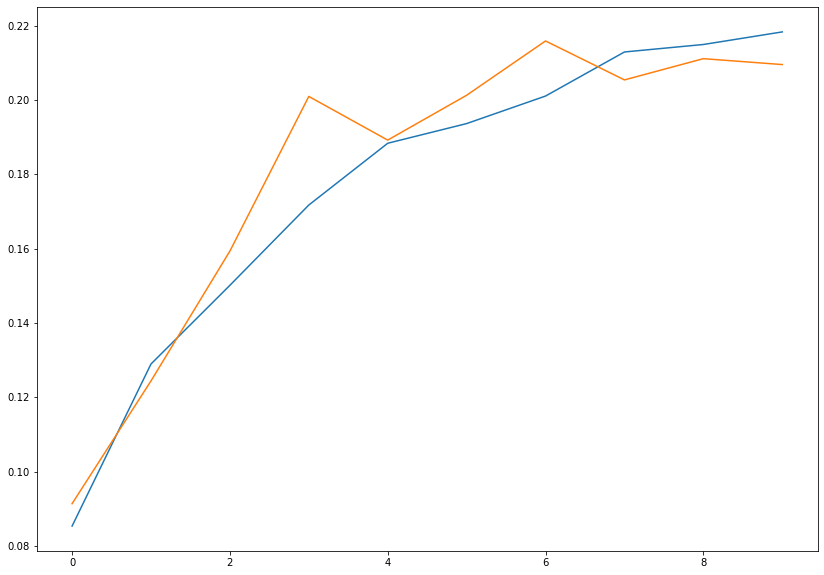

In [9]:
plt.figure(figsize=(14, 10))
plt.plot(top_history.history["accuracy"])
plt.plot(top_history.history["val_accuracy"])

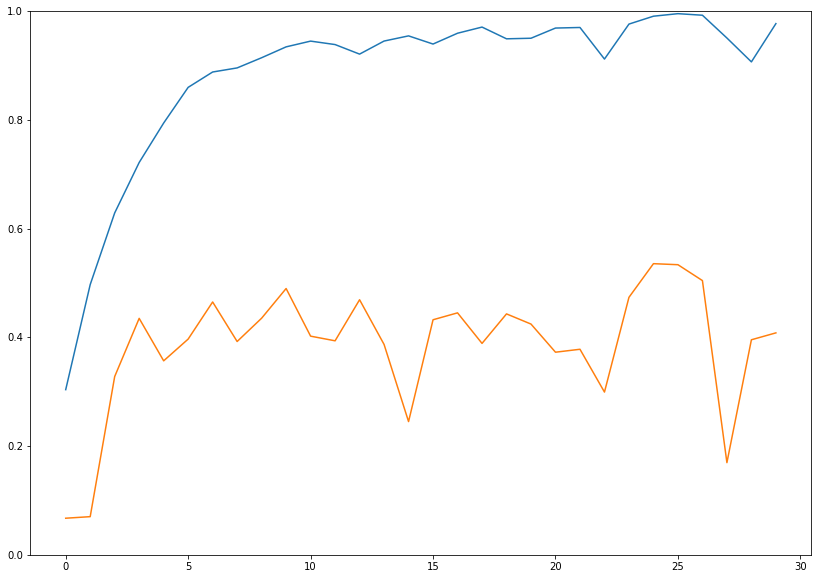

In [11]:
plt.figure(figsize=(14, 10))
plt.ylim(0, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])